Name: Suman Roy

Roll Number: MDS202041

NLP Assignment 01

In [ ]:
import os
import json

# Q1. Extracting the text content from the JSON-encoded dataset and creating a text corpus.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Unzipping the JSON Files

In [ ]:
!unzip "/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/pdf_json.zip" -d "/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/pdf_json2"

### Function for extracting the text content from the JSON

In [ ]:
def extract_text(filename):
    '''
    Extract the text from the file name (json file) and
    index the content from paper_id, title, abstract and body_text fields
    Retuns - text of title, abstract and bodt_text
    '''

    file = open(filename)
    body_text = ""
    abstract = ""
    title = ""
    paper_id = ""

    paper_content = json.load(file)

    #get the paper_id
    if 'paper_id' in paper_content:
        paper_id = paper_content['paper_id']
        
    #get the title, if available
    if 'title' in paper_content['metadata']:
        title = paper_content['metadata']['title']
    #get abstract.text, if available
    if 'abstract' in paper_content:
        for abs in paper_content['abstract']:
            abstract = abstract + abs['text']
    if 'body_text' in paper_content:
        for bt in paper_content['body_text']:
            body_text = body_text + bt['text']


   
    return (title + ' ' + abstract + ' ' + body_text + ' ').lower()

### Function for converting the JSON into text files in batches and writing the text content to a new .txt file

In [ ]:
def corpus_batch_process(batchstart,batchsize,N,foldername,outputfile):
  '''
  We would create the corpus processing the .txt files batchwise. There are total around 56,000 files.
  batchstart is the file index where the process would start. 
  batchsize is the number of files the function would process at a time. 
  foldername is the folderpath where all the .txt files are. 
  outputfile is the corpus output .txt file.
  N is the total number of .txt files present
  '''
  corpus_list=[]
  if (batchstart+batchsize)>N:
    batchend=N
  else:
    batchend=(batchstart+batchsize)
  file_list= os.listdir(foldername)
  for file in file_list[batchstart:batchend]:
    if file.endswith(".json"):
      text=extract_text(os.path.join(foldername, file))
      text=text.replace("\n"," ")
      corpus_list.append(text)
  
  corpus="\n".join(corpus_list)
  with open(outputfile,'a') as f:
    f.write(corpus)
  return corpus



### Total Number of JSON Files present

In [ ]:
len(os.listdir('/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/pdf_json2/pdf_json'))

56529

### Processing Batch 1 : File 0 to 20000

In [ ]:
foldername='/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/pdf_json2/pdf_json'
N=56529
batchstart=0
batchsize=20000
outputfile='/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/corpus.txt'

corpus1=corpus_batch_process(batchstart,batchsize,N,foldername,outputfile)

In [ ]:
#We are saving the text contents obtained from this batch to a seperate file for future requirement if needed. 
with open('/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/corpus1.txt','a') as f:
    f.write(corpus1)


### Processing Batch 2: File 20000 to End

In [ ]:
foldername='/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/pdf_json2/pdf_json'
N=56529
batchstart=20000
batchsize=40000
outputfile='/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/corpus.txt'

corpus2=corpus_batch_process(batchstart,batchsize,N,foldername,outputfile)

In [ ]:
#We are saving the text contents obtained from this batch to a seperate file for future requirement if needed. 
with open('/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/corpus2.txt','a') as f:
    f.write(corpus2)

# Q2. Preprocessing steps

**A. Discarding Non English documents from the corpus**

There are some Non-English files too in the corpus. For avoiding complexity in future processing steps, we would be discarding those and only work with English documents.
A library called 'langdetect' is being used to detect the language of the documents . 

**B. Using Regex patterns**

1.   Expanding words with ' (like you're, I'm etc. )   
2.   Removing all digits(as we are building a text corpus). 
3.   Removing foreign/non-ASCII characters. 
4.   Removing parenthesis and texts inside parenthesis(Assuming that those texts are extra information). Citations are inside third brackets. 
5.  Removing html addresses.
6.  Removing email addresses.
7.  Removing punctuations.
8.  Removing single alphabets except 'a' (like 'q', 'b' etc.) because they are either meaningless or part of some mathematical expression. 
9.  Removing extra white spaces. 

**C. Stopwords Removal**

**D. Lemmatization**

### Number of different files in the corpus
The files are seperated by '\n'(newline character). 

In [ ]:
with open('/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/corpus.txt','r') as f:
    doc=f.read()
print("Number of Documents=",len(doc.split('\n')))

Number of Documents= 56527


## Discarding Non-English Docs


In [ ]:
!pip install langdetect
from langdetect import detect

In [ ]:
from tqdm import tqdm

text_list=doc.split('\n')
list_eng_doc=[]
for text in tqdm(text_list):
  try:
    language = detect(text)
    if language=='en':
      list_eng_doc.append(text)
  except:
    pass

100%|██████████| 56527/56527 [35:50<00:00, 26.29it/s]


In [ ]:
len(list_eng_doc)

54843

### Saving the English document corpus in a file

In [ ]:
corpus_eng = '\n'.join(list_eng_doc)
with open('/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/corpus_english.txt','w') as f:
    f.write(corpus_eng)

## Preprocessing with Regex


### Regex patterns for Preprocessing

In [ ]:
import re

def decontracted(text):
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)

    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

def delete_single_alphabet(text):
  # function to remove single character except 'a' like 'b','x' etc.)
  pattern = re.compile(r' [b-zB-Z] ')
  return re.sub(pattern, ' ', text)

def delete_digit(text):
  # function to remove digits
  pattern = re.compile(r'\d')
  return re.sub(pattern, '', text)

def delete_foreign_characters(text):
  #function to remove foreign non-ascii characters
  pattern= re.compile(r'[^\x00-\x7F]+')
  return re.sub(pattern,' ',text)
  
def delete_parenthesis(text):
  #function to remove parenthesis and text inside parenthesis
  pattern = re.compile(r'[\[\(\{]+[^\n\[\(\{]*[\)\]\}]+')
  return re.sub(pattern, ' ', text)

def delete_html_address(text):
  #function to remove the html addresses
  pattern= re.compile(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,4}\b([-a-zA-Z0-9@:%_\+.~#?&\/\/=]*)')
  return re.sub(pattern,' ',text)

def delete_email(text):
  #function to remove email addresses
  pattern= re.compile(r' [a-zA-Z0-9+_.-]+@[a-zA-Z0-9.-]+ ')
  return re.sub(pattern,' ',text)

def delete_punctuations(text):
  #function to remove punctuations 
  pattern= re.compile(r'''[\[\]\(\)\{\}.`^!?'",:;~|_#$%&><=*\\\/\+\-\@]''')
  return re.sub(pattern,' ',text)

def delete_white_space(text):
  #function to remove extra white spaces
  pattern= re.compile(r'(?<= ) +')
  return re.sub(pattern,'',text)

In [ ]:
'''
Now we are reading the saved english documents and apply these preprocessing steps in batches
'''
import time
def preprocess_batches(text_list,batch_start,batch_end):
  batch=text_list[batch_start:batch_end]
  text="\n".join(batch)
  start=time.time()
  text=delete_digit(text)
  text=delete_foreign_characters(text)
  text=delete_parenthesis(text)
  text=delete_html_address(text)
  text=delete_email(text)
  text=delete_punctuations(text)
  text=delete_single_alphabet(text)
  #text=delete_white_space(text)
  end=time.time()
  print("time taken in seconds: ", (end-start))
  return text




In [ ]:
with open('/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/corpus_english.txt','r') as f:
    text=f.read()
text_list=text.split("\n")
N=len(text_list)

In [ ]:
print("Number of documents: ",N)

Number of documents:  54839


### Batchwise Preprocessing

In [ ]:
preprocess_1=preprocess_batches(text_list,0,20000)+'\n'

time taken in seconds:  61.55750632286072


In [ ]:
preprocess_2=preprocess_batches(text_list,20000,40000)+'\n'

time taken in seconds:  61.8885064125061


In [ ]:
preprocess_3=preprocess_batches(text_list,40000,N)

time taken in seconds:  44.810842514038086


### Writing the preprocessed documents to an output file

In [ ]:
with open('/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/corpus_english_preprocess.txt','a') as f:
    f.write(preprocess_1)

In [ ]:
with open('/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/corpus_english_preprocess.txt','a') as f:
    f.write(preprocess_2)

In [ ]:
with open('/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/corpus_english_preprocess.txt','a') as f:
    f.write(preprocess_3)

## Stopwords Removal

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = set(STOP_WORDS)
import time
def delete_stopwords_batch(text_list,batch_start,batch_end,output_file):
    start_time = time.time()
    batch=text_list[batch_start:batch_end]
    batch_new=[]
    for text in batch:
      doc=text.split(" ")      
      doc_wo_stopword = [word for word in doc if not word in stopwords]
      doc_new = ' '.join(doc_wo_stopword)
      batch_new.append(doc_new)
    corpus="\n".join(batch_new)
    if (batch_end%15000)==0:
      corpus=corpus+'\n'
    with open(output_file, 'a') as f:
        f.write(corpus.lower())
    end_time = time.time()
    print("time taken: ", (end_time - start_time), 'Seconds')


In [ ]:
len(stopwords)

326

In [ ]:
with open('/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/corpus_english_preprocess.txt','r') as f:
    text=f.read()
text_list=text.split("\n")
N=len(text_list)
print("Number of Files= ",N)
output_file='/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/corpus_english_stopwords.txt'

Number of Files=  54839


**Batch 1 (0-15000)**

In [ ]:
batch_start=0
batch_end=15000
delete_stopwords_batch(text_list,batch_start,batch_end,output_file)

time taken:  14.819015502929688 Seconds


**Batch 2 (15000-30000)**

In [ ]:
batch_start=15000
batch_end=30000
delete_stopwords_batch(text_list,batch_start,batch_end,output_file)

time taken:  15.423940420150757 Seconds


**Batch 3 (30000-45000)**

In [ ]:
batch_start=30000
batch_end=45000
delete_stopwords_batch(text_list,batch_start,batch_end,output_file)

time taken:  17.020657539367676 Seconds


**Batch 4 (45000-End)**

In [ ]:
batch_start=45000
batch_end=N
delete_stopwords_batch(text_list,batch_start,batch_end,output_file)

time taken:  11.464322328567505 Seconds


## Lemmatization

In [ ]:
with open('/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/corpus_english_stopwords.txt','r') as f:
    text=f.read()
text_list=text.split("\n")
N=len(text_list)
print("Number of Documents=",N)

Number of Documents= 54839


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def nltk_pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):

    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    wordnet_tagged = map(lambda x: (x[0], nltk_pos_tagger(x[1])), nltk_tagged)
    lemmatized_sentence = []
    
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:        
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [ ]:
def lemmatization_batches(text_list,batch_start,batch_end):
  batch=text_list[batch_start:batch_end]
  processed=[]
  for sentence in batch:
    processed.append(lemmatize_sentence(sentence))
  text="\n".join(processed)

  return text

**Batch 1**

In [ ]:
lemma_1=lemmatization_batches(text_list,0,10000)+'\n'
with open('/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/corpus_english_lemma.txt','a') as f:
    f.write(lemma_1)
print("Done")

Done


**Batch 2**

In [ ]:
lemma_2=lemmatization_batches(text_list,10000,20000)+'\n'
with open('/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/corpus_english_lemma.txt','a') as f:
    f.write(lemma_2)
print("Done")

Done


**Batch 3**

In [ ]:
lemma_3=lemmatization_batches(text_list,20000,30000)+'\n'
with open('/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/corpus_english_lemma.txt','a') as f:
    f.write(lemma_3)
print("Done")

Done


**Batch 4**

In [ ]:
lemma_4=lemmatization_batches(text_list,30000,40000)+'\n'
with open('/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/corpus_english_lemma.txt','a') as f:
    f.write(lemma_4)
print("Done")

Done


**Batch 5**

In [ ]:
lemma_5=lemmatization_batches(text_list,40000,50000)+'\n'
with open('/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/corpus_english_lemma.txt','a') as f:
    f.write(lemma_5)
print("Done")

Done


**Batch 6**

In [ ]:
lemma_6=lemmatization_batches(text_list,50000,N)+'\n'
with open('/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/corpus_english_lemma.txt','a') as f:
    f.write(lemma_6)
print("Done")

Done


# Q3. Counting the frequency of the word in the vocabulary

### Function to tokenize the corpus and calculate frequencies of each token

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize  
def word_freq(word_count,frequency,text_list,batch_start,batch_end,V_n,n):

  #frequency is a dictionary
  for doc in text_list[batch_start:batch_end]:
    words=word_tokenize(doc)
    for word in words:
      word_count=word_count+1
      if word in frequency.keys():
        frequency[word]=frequency[word]+1
      else:
        frequency[word]=1

      if word_count%10000==0:
        V_n.append(len(frequency.keys()))
        n.append(word_count)


In [ ]:
frequency={}
word_count=0
V_n=[]   #list to store number of unique vocabularies in an interval of 10000 words
n=[]     #list to store number of words in an interval of 10000 words
with open('/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/corpus_english_lemma.txt','r') as f:
    text=f.read()
text_list=text.split("\n")

**Processing as a single batch to get the token and vocabulary count**

In [ ]:
batch_start=0
batch_end=len(text_list)
word_freq(word_count,frequency,text_list,batch_start,batch_end,V_n,n)

In [ ]:
print("Size of Vocabulary=", len(frequency.keys()))

Size of Vocabulary= 645475


### Sorting the dictionary based on the frequency of the words
If two words have same frequency, we are sorting them lexicographically

In [ ]:
frequency_sorted = {key: value for key, value in sorted(frequency.items(), key=lambda a: (-a[1],a[0]), reverse=False)}

### Creating and saving a dataframe containing ranks and frequencies of the vocabulary

In [ ]:
import pandas as pd
temp={}
temp['Rank']=[]
temp['Word']=[]
temp['Frequency']=[]
rank = 1
for key in frequency_sorted.keys():
    temp['Rank'].append(rank)
    temp['Word'].append(key)
    temp['Frequency'].append(frequency_sorted[key])
    rank += 1
df = pd.DataFrame(temp)
df.head()

,Rank,Word,Frequency
0,1,patient,875010
1,2,cell,786077
2,3,study,691216
3,4,virus,537057
4,5,infection,522404


In [ ]:
df.to_csv('/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/frequency.csv')

### Saving count of words and vocabulary at an interval of 10000 words for future reference

In [ ]:
d = {'Count of Words': n, 'Count of Vocabulary': V_n}
df2 = pd.DataFrame(data=d)
df2.to_csv('/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/heaps_law.csv')

### Ploting Frequency vs. Rank

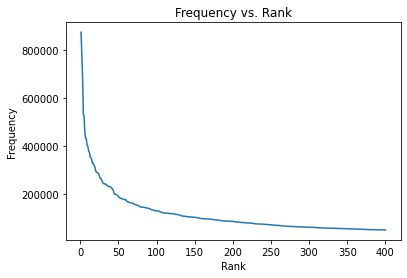

In [ ]:
import matplotlib.pyplot as plt
rank=list(df['Rank'])
freq=list(df['Frequency'])
plt.plot(rank[0:400],freq[0:400])
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Frequency vs. Rank')
plt.show()

### **Zipf's Law**
The *Zipf's Law* is a statistical distribution in the dataset generally said as linguistic corpus, in which the frequency of the word is inversely proportional to their ranks. The distribution of word frequency count follows a simple mathematical relationship known as *Zipf's Law*. 

$    frequency(f) ∝ \frac{1}{r^\alpha} \\
\implies f = \frac{k}{r^\alpha} \\
\implies α  = \frac{\log k - \log f}{\log r}$

We have to estimate the value of $α$ from the frequency-rank table that we generated from this corpus and see how it performs with the actual scenario. 

When $r=1$, we see that $k=f$. 

In [ ]:
k=freq[0]

Now using this value of $k$, we will estimate values of $\alpha$ for all the rows and take the average. 

In [ ]:
import numpy as np
a=np.log(k/np.array(freq[1:]))/np.log(np.array(rank[1:]))  #discarding the first value because in the denominator log1=0 will appear

**Average Value of $\alpha$**

In [ ]:
alpha=a.mean()
print("Average value of alpha=",alpha)

Average value of alpha= 1.015180324690768


Now let's estimate the values of the frequencies from the alpha value obtained. 

In [ ]:
freq_estimated=k/np.array(rank)**alpha

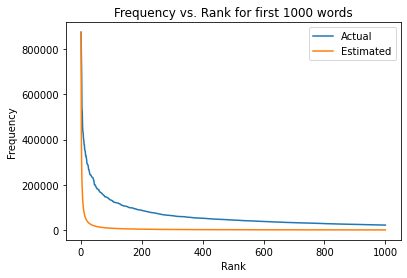

In [ ]:
import matplotlib.pyplot as plt
plt.plot(rank[0:1000],freq[0:1000])
plt.plot(rank[0:1000],freq_estimated[0:1000])
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Frequency vs. Rank for first 1000 words')
plt.legend(['Actual','Estimated'])
plt.show()

# Q4. Plotting Tokens Vs Vocabulary graph using Heaps’ empirical law

**Heap's Law**

This is used to estimate the number of unique terms M in a corpus given the total number of tokens(T):

$M=kT^b$

$\log _{10} M=\log _{10} k+b \log _{10} T$

To calculate the values of $k$ and $b$ we need two pairs of values of $M$ and $T$. 

We would use tthe values when $M=10000$ and $M=40000$.

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/CMI/Semester 4/NLP/Assignment 1/heaps_law.csv')
T=(df['Count of Words'])
M=(df['Count of Vocabulary'])
log_T = np.log10(T)
log_M = np.log10(M)

x1 = log_T[0]
x2 = log_T[3]
y1 = log_M[0]
y2 = log_M[3]

b = (y2-y1)/(x2-x1)
log_k = y2 - (b*x2)

log_M_estimate=log_k + (b*log_T)


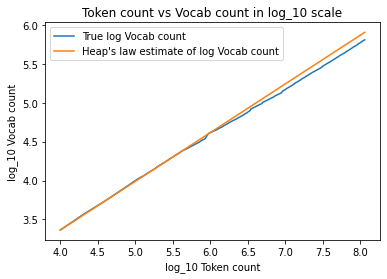

In [ ]:
plt.plot(log_T, log_M, label = "True log Vocab count")
plt.plot(log_T, log_M_estimate, label = "Heap's law estimate of log Vocab count")
plt.xlabel("log_10 Token count")
plt.ylabel("log_10 Vocab count")
plt.title("Token count vs Vocab count in log_10 scale")
plt.legend()
plt.show()